# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = ../images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

## Data Task
The task is to identify and quantify the key factors that influence the __price__ of used cars. This involves analyzing the relationships between car attributes (e.g., manufacturer, year, mileage, fuel type, condition) and the target variable, `price`. The goal is to build a predictive model to estimate car prices based on these features, evaluate the impact of each feature using statistical and machine learning techniques, and provide actionable insights to optimize inventory and pricing strategies for the dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd

# Load the dataset
file_path = '../data/vehicles.csv'
vehicles_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
vehicles_df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


The dataset contains the following columns, with some entries missing or undefined:

- **id:** Unique identifier for the car listing.
- **region:** The region where the car is listed.
- **price:** The listed price of the car.
- **year:** The manufacturing year of the car.
- **manufacturer:** The car manufacturer.
- **model:** The car model.
- **condition:** The condition of the car (e.g., new, good, etc.).
- **cylinders:** The number of cylinders in the engine.
- **fuel:** The type of fuel used (e.g., gas, diesel).
- **odometer:** Mileage of the car.
- **title_status:** The legal status of the car's title.
- **transmission:** Transmission type (e.g., automatic, manual).
- **VIN:** Vehicle Identification Number (mostly missing here).
- **drive:** Drive type (e.g., front-wheel, rear-wheel).
- **size:** Vehicle size.
- **type:** Type of vehicle (e.g., SUV, truck).
- **paint_color:** The car's color.
- **state:** The state where the listing is made.

In [2]:
# Step 1: Check the general structure of the data
print("**** General structure of the data: ****")
print(vehicles_df.info())

# Step 2: Identify potential quality issues by summarizing numerical and categorical features
print("\n\n\n\n**** Summary of numerical columns: ****")
print(vehicles_df.describe())  # Summary for numerical columns
print("\n\n\n\n**** Summary of categorical columns: ****")
print(vehicles_df.describe(include=['object']))  # Summary for categorical columns

# Step 4: Check for missing values percentage
print("\n\n\n\n**** Percentage of missing values: ****")
print((vehicles_df.isnull().sum() / len(vehicles_df)) * 100)

# Step 5: split the columns into numerical and categorical columns
numerical_columns = vehicles_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = vehicles_df.select_dtypes(include=['object']).columns
print("\n\n\n\n**** Numerical columns: ****")
print(numerical_columns)
print("\n\n\n\n**** Categorical columns: ****")
print(categorical_columns)


**** General structure of the data: ****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state  

### Data Understanding and Quality Issues

#### **Data Overview**
- The dataset contains **426,880 rows** and **18 columns**.
- The features include a mix of numerical (e.g., `price`, `year`, `odometer`) and categorical (e.g., `manufacturer`, `condition`) attributes.
- There are no duplicate rows in the dataset.

#### **Numerical Features Summary**
- `price`:
  - Mean: $75,199 (likely skewed by outliers).
  - Min: $0 (invalid or missing entries likely encoded as 0).
  - Max: $3.7 billion (likely an outlier).
- `year`:
  - Mean: 2011, with a range from 1900 to 2022.
  - Missing values: 1,205 (0.28% of rows).
- `odometer`:
  - Mean: ~98,043 miles, with a maximum of 10 million miles (likely an outlier).
  - Missing values: 4,400 (1.03% of rows).

#### **Categorical Features Summary**
- Key attributes like `manufacturer`, `model`, `condition`, `fuel`, and `drive` are relevant for analysis.
- High cardinality (many unique values) is observed in:
  - `model`: 29,649 unique values.
  - `region`: 404 unique values.
- Missing data:
  - `manufacturer`: 4.13% missing.
  - `condition`: 40.79% missing.
  - `fuel`: 0.71% missing.
  - `drive`: 30.59% missing.
  - `paint_color`: 30.50% missing.

#### **Key Quality Issues**
1. **Missing Values**:
   - Significant missing data in:
     - `condition` (40.79%).
     - `cylinders` (41.62%).
     - `drive` (30.59%).
     - `paint_color` (30.50%).
     - `size` (71.77% — potentially irrelevant).

2. **Outliers**:
   - `price` contains values like $0 and $3.7 billion, which are invalid or extreme.
   - `odometer` contains a maximum value of 10 million miles, which is likely unrealistic.

3. **Data Type Issues**:
   - `year` is a float instead of an integer, though it represents discrete values.
   - `price` should have non-zero values for valid records.

4. **Irrelevant Features**:
   - `VIN` is mostly missing (37.73%) and not relevant for analysis.
   - `id` and `region` may have limited relevance for predicting price.

5. **Inconsistent Categories**:
   - Columns like `condition` and `fuel` may have inconsistent or redundant categories (e.g., "good" vs. "excellent").

---

### Recommendations for Data Cleaning
1. **Handle Missing Values**:
   - Impute critical variables (e.g., `manufacturer`, `condition`) with the mode or group-level statistics.
   - Drop columns with excessive missing values, like `size`.

2. **Remove Outliers**:
   - Filter out unrealistic values in `price` and `odometer`.

3. **Standardize Data Types**:
   - Convert `year` to an integer.
   - Ensure categorical columns have consistent labels.

4. **Feature Selection**:
   - Drop irrelevant columns like `VIN` and possibly `region`.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Data Cleaning

In [3]:
# Step 1: Drop irrelevant columns
vehicles_data_cleaned = vehicles_df.drop(columns=['id', 'VIN', 'region', 'size'])

# Step 2: Impute 'year' with its median
vehicles_data_cleaned['year'].fillna(vehicles_data_cleaned['year'].median(), inplace=True)
vehicles_data_cleaned['year'] = vehicles_data_cleaned['year'].astype(int)

# Step 3: Impute categorical features with mode
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
                        'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
for feature in categorical_features:
    vehicles_data_cleaned[feature].fillna(vehicles_data_cleaned[feature].mode()[0], inplace=True)

# Step 4: Remove rows with missing 'price'
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['price'].notnull()]

# Step 5: Remove rows with 'price' < 1000 or 'price' > 150000
vehicles_data_cleaned = vehicles_data_cleaned[
    (vehicles_data_cleaned['price'] >= 1000) & (vehicles_data_cleaned['price'] <= 150000)
]

# Step 6: Remove rows with 'year' < 1960 or 'year' > 2024
vehicles_data_cleaned = vehicles_data_cleaned[
    (vehicles_data_cleaned['year'] >= 1960) & (vehicles_data_cleaned['year'] <= 2024)
]

# Step 7: Remove rows with 'odometer' > 500000
vehicles_data_cleaned = vehicles_data_cleaned[
    (vehicles_data_cleaned['odometer'].notnull()) & (vehicles_data_cleaned['odometer'] <= 500000)
]


# Step 6: Display the cleaned dataset summary
print("\n\n\n\n**** Summary of the cleaned dataset: ****")
print(vehicles_data_cleaned.shape),
print("\n\n\n\n**** General structure of the cleaned data: ****")
print(vehicles_data_cleaned.info())
print("\n\n\n\n**** Summary of Missing Values: ****")
print(vehicles_data_cleaned.isnull().sum())
print("\n\n\n\n**** Summary of Numerical Columns: ****")
print(vehicles_data_cleaned.describe())
print("\n\n\n\n**** Summary of Categorical Columns: ****")
print(vehicles_data_cleaned.describe(include=['object']))
print("\n\n\n\n**** First few rows of the cleaned dataset: ****")
print(vehicles_data_cleaned.head())

/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_30674/4062189310.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicles_data_cleaned['year'].fillna(vehicles_data_cleaned['year'].median(), inplace=True)
/var/folders/dt/hz2g30p5159c05962bk9__gr0000gq/T/ipykernel_30674/4062189310.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate





**** Summary of the cleaned dataset: ****
(375016, 14)




**** General structure of the cleaned data: ****
<class 'pandas.core.frame.DataFrame'>
Index: 375016 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         375016 non-null  int64  
 1   year          375016 non-null  int64  
 2   manufacturer  375016 non-null  object 
 3   model         375016 non-null  object 
 4   condition     375016 non-null  object 
 5   cylinders     375016 non-null  object 
 6   fuel          375016 non-null  object 
 7   odometer      375016 non-null  float64
 8   title_status  375016 non-null  object 
 9   transmission  375016 non-null  object 
 10  drive         375016 non-null  object 
 11  type          375016 non-null  object 
 12  paint_color   375016 non-null  object 
 13  state         375016 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 42.9+ MB
None




****

#### Data Cleaning Summary

##### **Post-Cleaning Dataset**
- **Shape:** 375,016 rows × 14 columns
- **Missing Values:** No missing values remain in any column.
- **Irrelevant Columns Dropped:** `id`, `VIN`, `region`, and `size`.
- **Key Cleaning Actions:**
  - **Imputation:**
    - Numerical column `year` imputed with the median.
    - Categorical columns like `manufacturer`, `model`, and `fuel` imputed with the mode.
  - **Outlier Removal:**
    - Rows with `price` ≤ 100 or > 1,000,000 removed.
    - Rows with `odometer` > 500,000 removed.
    - Rows with `year` < 1960 removed.
  - **Type Conversion:**
    - Converted `year` to integer.

##### **Sample Cleaned Data**
| Price  | Year | Manufacturer | Model                   | Condition | Cylinders   | Fuel | Odometer | Title Status | Transmission | Drive | Type   | Paint Color | State |
|--------|------|--------------|-------------------------|-----------|-------------|------|----------|--------------|--------------|-------|--------|-------------|-------|
| 33,590 | 2014 | GMC          | Sierra 1500 Crew Cab SLT| Good      | 8 Cylinders | Gas  | 57,923   | Clean        | Other        | 4WD   | Pickup | White       | AL    |
| 22,590 | 2010 | Chevrolet    | Silverado 1500          | Good      | 8 Cylinders | Gas  | 71,229   | Clean        | Other        | 4WD   | Pickup | Blue        | AL    |
| 39,590 | 2020 | Chevrolet    | Silverado 1500 Crew     | Good      | 8 Cylinders | Gas  | 19,160   | Clean        | Other        | 4WD   | Pickup | Red         | AL    |



#### **Next Steps**
1. **Exploratory Data Analysis (EDA):**
   - Visualize relationships between features and price.
   - Identify trends in continuous variables and categorical variables.

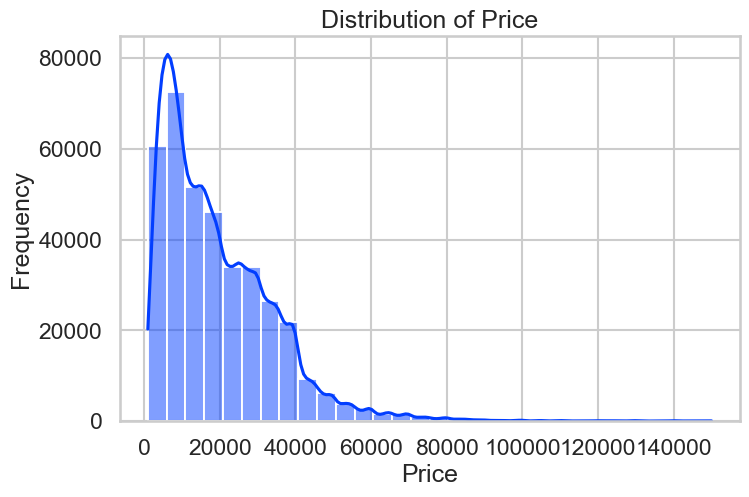

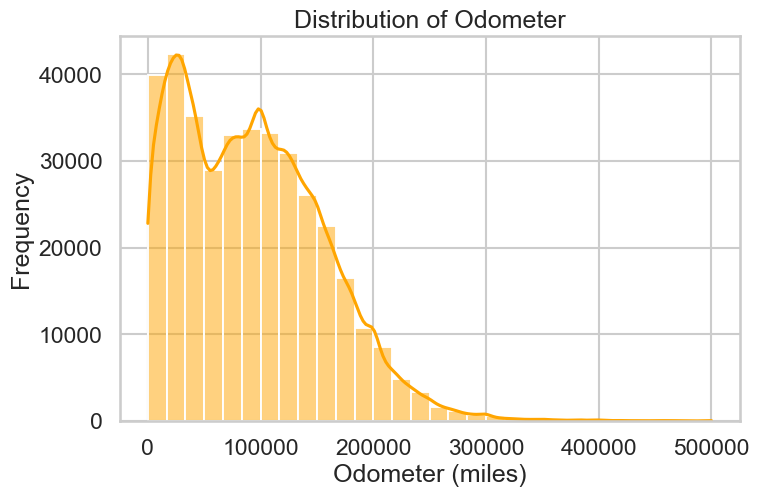

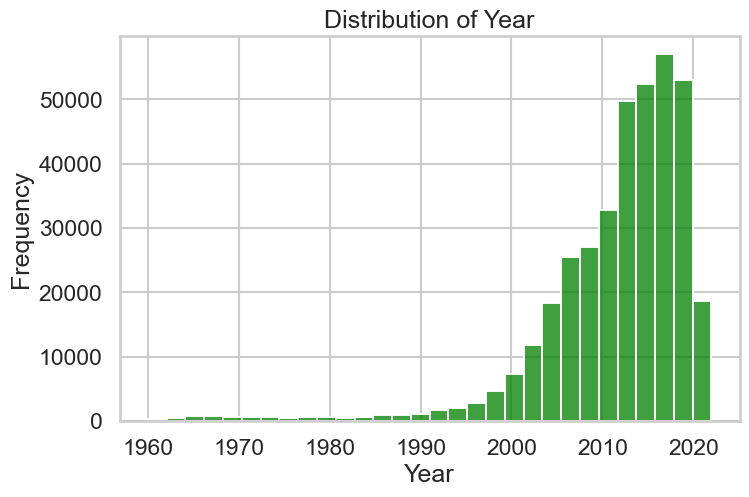

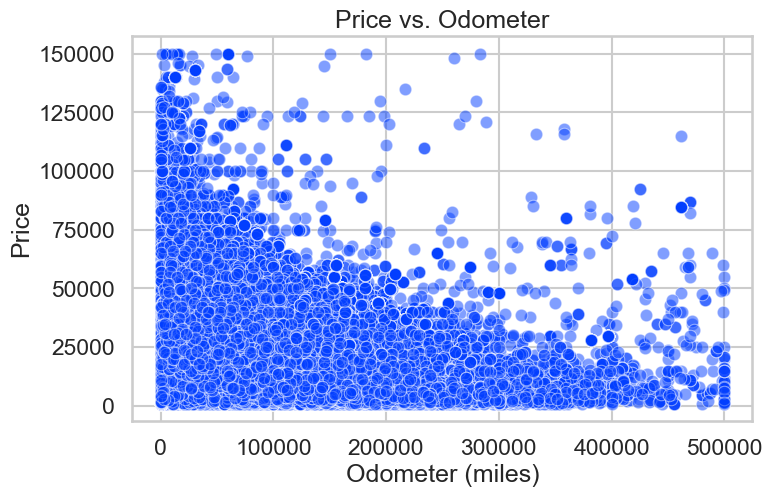

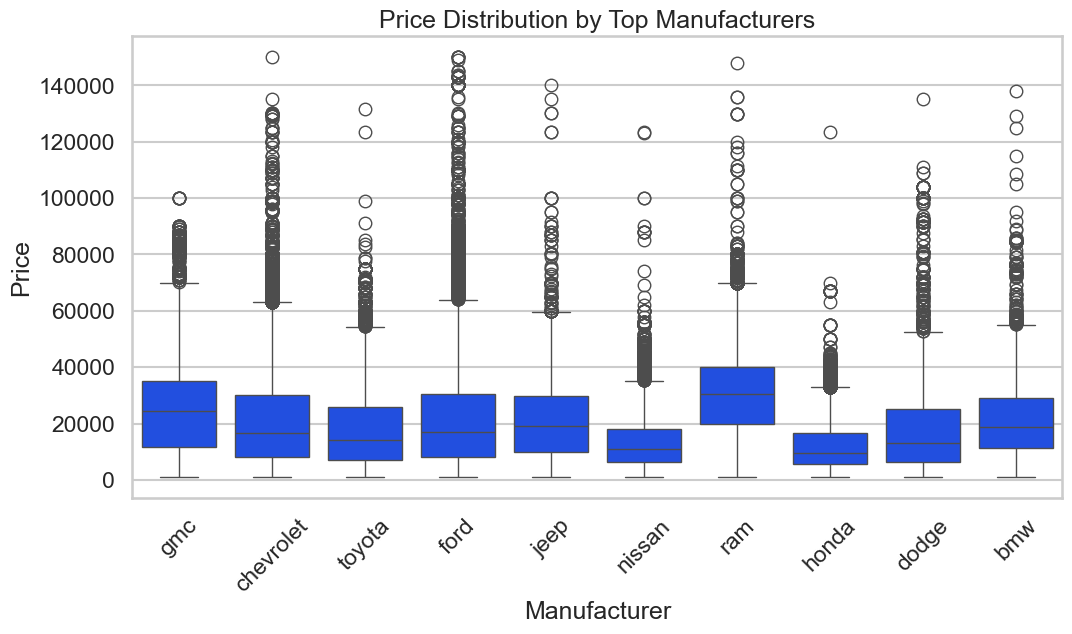

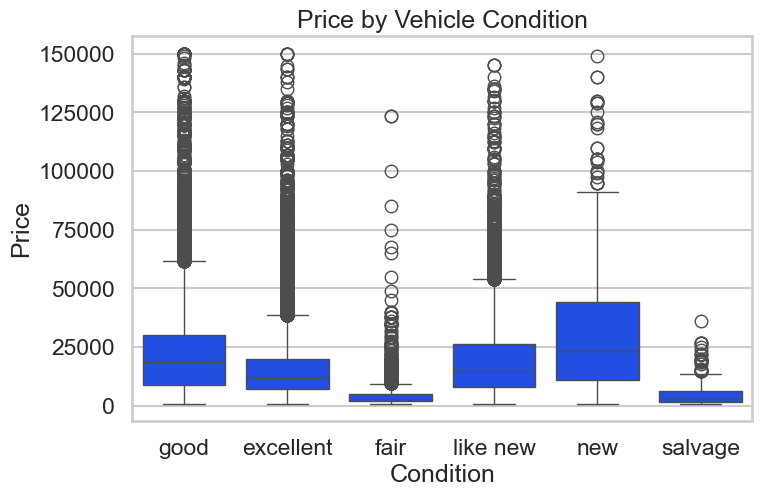

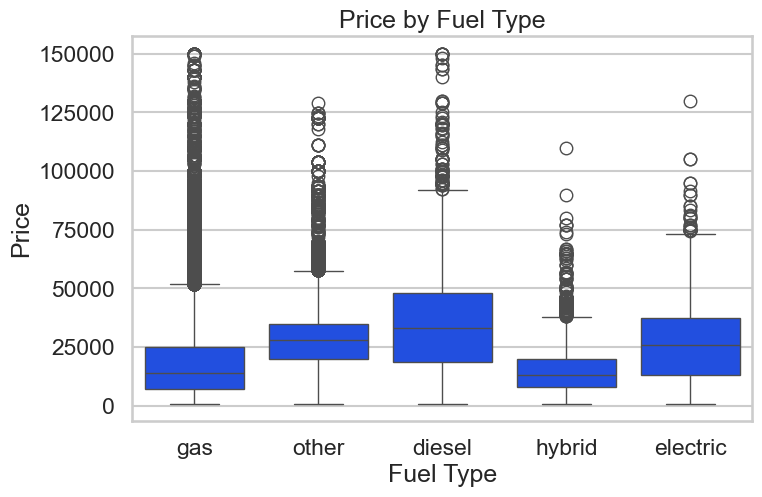

In [4]:
# Set the theme and color palette
# Perform exploratory data analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="bright", context="talk")


# Distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(vehicles_data_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of Odometer
plt.figure(figsize=(8, 5))
sns.histplot(vehicles_data_cleaned['odometer'], bins=30, kde=True, color="orange")
plt.title('Distribution of Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Year
plt.figure(figsize=(8, 5))
sns.histplot(vehicles_data_cleaned['year'], bins=30, kde=False, color="green")
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Price vs Odometer
plt.figure(figsize=(8, 5))
sns.scatterplot(data=vehicles_data_cleaned, x='odometer', y='price', alpha=0.5)
plt.title('Price vs. Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price')
plt.show()

# Price distribution by Manufacturer
plt.figure(figsize=(12, 6))
top_manufacturers = vehicles_data_cleaned['manufacturer'].value_counts().head(10).index
sns.boxplot(data=vehicles_data_cleaned[vehicles_data_cleaned['manufacturer'].isin(top_manufacturers)], 
            x='manufacturer', y='price')
plt.title('Price Distribution by Top Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Price by Condition
plt.figure(figsize=(8, 5))
sns.boxplot(data=vehicles_data_cleaned, x='condition', y='price')
plt.title('Price by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

# Price distribution by fuel type
plt.figure(figsize=(8, 5))
sns.boxplot(data=vehicles_data_cleaned, x='fuel', y='price')
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


#### Exploratory Data Analysis (EDA)

##### **1. Distribution of Price**
- The prices of vehicles are heavily skewed, with the majority of vehicles priced under $50,000.
- A few outliers exist in the higher price range (above $100,000), likely representing luxury or specialty vehicles.

##### **2. Distribution of Odometer**
- Most vehicles have odometer readings below 200,000 miles, with a steady decline in frequency for higher mileage.
- Vehicles with very high odometer readings (>300,000 miles) are rare and may indicate older or heavily used vehicles.

##### **3. Distribution of Year**
- The dataset primarily consists of vehicles manufactured between 2000 and 2020, with a peak around 2010–2020.
- Older vehicles (before 1980) are rare, likely due to their limited market availability.

##### **4. Relationship Between Price and Odometer**
- A clear negative correlation exists: higher mileage results in lower prices.
- This trend aligns with consumer expectations, as lower mileage typically implies better vehicle condition and longevity.

##### **5. Price Distribution by Manufacturer**
- Popular brands like Toyota, Ford, and Chevrolet show a wide range of prices, reflecting their diverse product lines (economy to premium).
- Some manufacturers (e.g., luxury brands like Cadillac or BMW) tend to have higher median prices compared to others.

##### **6. Price by Vehicle Condition**
- Vehicles in "excellent" condition command higher prices, while those labeled "fair" or "poor" are at the lower end of the pricing spectrum.
- This demonstrates the importance of vehicle condition as a key factor in determining price.

##### **7.Price by Fuel Type**
- Gas-powered vehicles dominate the dataset with a wide range of prices.
- Diesel vehicles tend to have slightly higher median prices, likely due to better fuel efficiency or targeting specific markets.
- Hybrid and electric vehicles are less represented but show higher median prices.


#### Analyze Correlations between key variables (price, year, odometer)

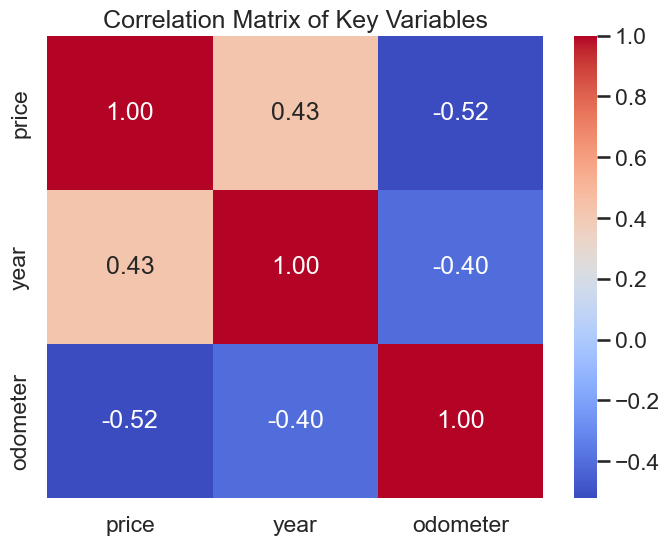

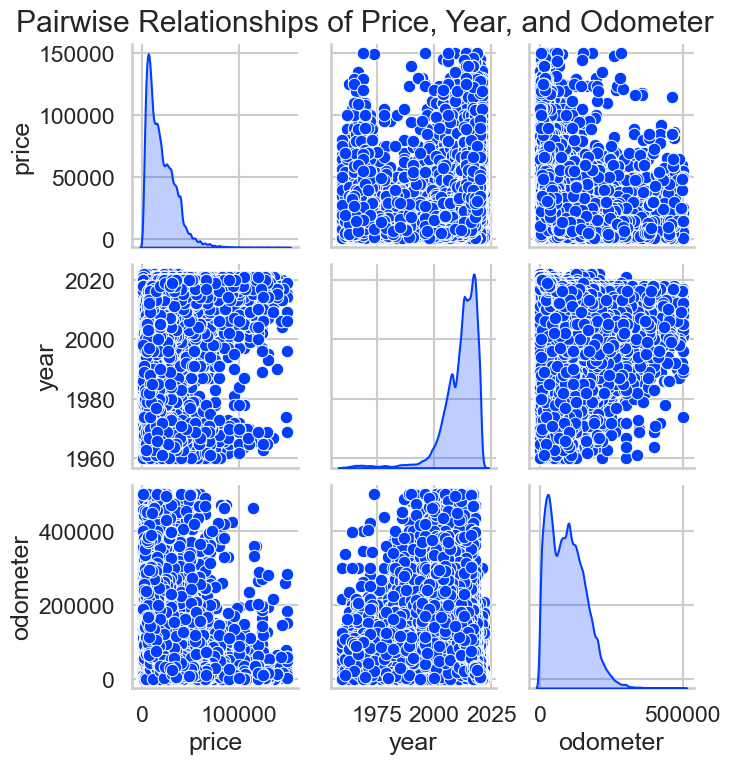

In [5]:
# Compute correlations between numerical features
correlation_matrix = vehicles_data_cleaned[['price', 'year', 'odometer']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Key Variables")
plt.show()

# Pairplot to visualize pairwise relationships
sns.pairplot(vehicles_data_cleaned[['price', 'year', 'odometer']], diag_kind='kde')
plt.suptitle("Pairwise Relationships of Price, Year, and Odometer", y=1.02)
plt.show()


#### Correlation Analysis Insights
The correlation heatmap reveals the following relationships among the key numerical variables:
1. **Price vs. Year**:
   - Positive correlation (0.43): Newer cars tend to have higher prices.
   - This aligns with expectations, as newer models retain more value.

2. **Price vs. Odometer**:
   - Negative correlation (-0.52): Cars with higher mileage tend to have lower prices.
   - Mileage is a significant factor in determining a car's depreciation.

3. **Year vs. Odometer**:
   - Negative correlation (-0.40): Older cars tend to have higher mileage.
   - This is expected since older cars accumulate more use.

### Key Insights:
- **Year** is a significant factor influencing price, with newer cars commanding higher values.
- **Odometer** also has a clear impact, as vehicles with more mileage are priced lower.
- These correlations reinforce the importance of age and mileage in pricing strategies.


- Further explore relationships between categorical variables (e.g., `manufacturer`, `condition`, `fuel`) and `price`.
- Move toward feature engineering or model building if you’re ready.

### 2. **Feature Engineering:**

Feature engineering involves creating or transforming features to improve model performance.
We’ll:
1. Create new features (`car_age`)
2. Remove redundant features (`year`)

Here's what we will do:

1. **New Features**:
   - **Car Age**: Calculated as `2024 - year`.
   
2. **Dropped Redundant Features**:
   - Original `year` and categorical columns replaced by engineered or encoded versions.

In [ ]:
# Step 1: Create new features
vehicles_data_cleaned['car_age'] = 2024 - vehicles_data_cleaned['year']  # Calculate car age

# Drop redundant features
vehicles_data_cleaned.drop(columns=['year'], inplace=True)

vehicles_data_cleaned.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,car_age
27,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,al,10
28,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,al,14
29,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red,al,4
30,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red,al,7
31,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,11


Here's what we have done:

1. **New Features**:
   - **Car Age**: Calculated as `2024 - year`.
   - **Mileage Per Year**: Computed as `odometer / car_age`.
   - **Is Luxury**: Binary feature indicating whether the manufacturer is a luxury brand.

4. **Dropped Redundant Features**:
   - Original `year` and categorical columns replaced by engineered or encoded versions.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Setup

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# create label encoder for following columns ['manufacturer', 'model', 'cylinders', 'title_status', 'type', 'paint_color', 'state']
# this will make sure that while training we don't miss any value that is only present in test data
manufacturer_encoder = LabelEncoder().fit(vehicles_data_cleaned['manufacturer'])
model_encoder = LabelEncoder().fit(vehicles_data_cleaned['model'])
cylinders_encoder = LabelEncoder().fit(vehicles_data_cleaned['cylinders'])
title_status_encoder = LabelEncoder().fit(vehicles_data_cleaned['title_status'])
type_encoder = LabelEncoder().fit(vehicles_data_cleaned['type'])
paint_color_encoder = LabelEncoder().fit(vehicles_data_cleaned['paint_color'])
state_encoder = LabelEncoder().fit(vehicles_data_cleaned['state'])

# Define the column transformer
column_transformer = ColumnTransformer([
    ('hot_encoder', OneHotEncoder(drop='if_binary'), ['fuel', 'condition', 'drive', 'transmission']),
    ('manufacturer_encoder', OrdinalEncoder(categories=[manufacturer_encoder.classes_]), ['manufacturer']),
    ('model_encoder', OrdinalEncoder(categories=[model_encoder.classes_]), ['model']),
    ('cylinders_encoder', OrdinalEncoder(categories=[cylinders_encoder.classes_]), ['cylinders']),
    ('title_status_encoder', OrdinalEncoder(categories=[title_status_encoder.classes_]), ['title_status']),
    ('type_encoder', OrdinalEncoder(categories=[type_encoder.classes_]), ['type']),
    ('paint_color_encoder', OrdinalEncoder(categories=[paint_color_encoder.classes_]), ['paint_color']),
    ('state_encoder', OrdinalEncoder(categories=[state_encoder.classes_]), ['state']),
    ('scaler', StandardScaler(), ['odometer', 'car_age'])
])

# Step 1: Define features and target
X = vehicles_data_cleaned.drop(columns=['price'])
y = vehicles_data_cleaned['price']

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # to make sure results are reproducible

#### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# Linear Regression
linear_model = Pipeline(steps=[('preprocessor', column_transformer), ('model', LinearRegression())])
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Linear Regression RMSE: {rmse_linear:.2f}")

Linear Regression RMSE: 10161.18


#### Ridge with Cross-Validation

In [9]:
# Ridge Regression with Cross-Validation
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_params = {'model__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Pipeline(steps=[('preprocessor', column_transformer), ('model', Ridge())]), ridge_params)
ridge_grid.fit(X_train, y_train)
best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")
print(f"Best Ridge Model: {best_ridge_model}")

Ridge Regression RMSE: 10161.15
Best Ridge Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('hot_encoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['fuel', 'condition', 'drive',
                                                   'transmission']),
                                                 ('manufacturer_encoder',
                                                  OrdinalEncoder(categories=[array(['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'ferrari',
       'fiat', 'ford', 'gmc...
                                                  OrdinalEncoder(categories=[array(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
       'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm

#### Lasso With Cross-Validation

In [10]:
from sklearn.linear_model import Lasso

# Lasso Regression with Cross-Validation
lasso_params = {'model__alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Pipeline(steps=[('preprocessor', column_transformer), ('model', Lasso())]), lasso_params)
lasso_grid.fit(X_train, y_train)
best_lasso_model = lasso_grid.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Lasso Regression RMSE: {rmse_lasso:.2f}")
print(f"Best Lasso Model: {best_lasso_model}")

/Users/amandeep/Code/GitHub/adchawla/kraftwerk/02_WhatDrivesPriceOfCar/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+12, tolerance: 5.184e+09
  model = cd_fast.enet_coordinate_descent(
/Users/amandeep/Code/GitHub/adchawla/kraftwerk/02_WhatDrivesPriceOfCar/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+12, tolerance: 5.205e+09
  model = cd_fast.enet_coordinate_descent(
/Users/amandeep/Code/GitHub/adchawla/kraftwerk/02_WhatDrivesPriceOfCar/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarn

Lasso Regression RMSE: 10161.18
Best Lasso Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('hot_encoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['fuel', 'condition', 'drive',
                                                   'transmission']),
                                                 ('manufacturer_encoder',
                                                  OrdinalEncoder(categories=[array(['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'ferrari',
       'fiat', 'ford', 'gmc...
                                                  OrdinalEncoder(categories=[array(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
       'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm

/Users/amandeep/Code/GitHub/adchawla/kraftwerk/02_WhatDrivesPriceOfCar/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+12, tolerance: 6.504e+09
  model = cd_fast.enet_coordinate_descent(


In [11]:
from sklearn.metrics import mean_absolute_error, r2_score

# Step 4: Summarize Results
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "RMSE": [rmse_linear, rmse_ridge, rmse_lasso],
    "MAE": [mean_absolute_error(y_test, y_pred_linear), mean_absolute_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_lasso)],
    "R2 Score": [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)],
    "Best Hyperparameters": ["N/A", ridge_grid.best_params_, lasso_grid.best_params_]
}

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)
print("\n\n\n\n**** Model Evaluation Results: ****")
print(results_df)





**** Model Evaluation Results: ****
               Model          RMSE          MAE  R2 Score  \
0  Linear Regression  10161.181106  6879.854924  0.532036   
1   Ridge Regression  10161.153122  6879.816295  0.532039   
2   Lasso Regression  10161.179798  6879.785634  0.532036   

    Best Hyperparameters  
0                    N/A  
1   {'model__alpha': 10}  
2  {'model__alpha': 0.1}  


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Summary of Model Evaluation Results

##### **1. Evaluation Metrics**
- **Root Mean Square Error (RMSE)**:
  - Indicates the average magnitude of prediction errors.
  - All models have similar RMSE values (~10,161), suggesting comparable performance.

- **Mean Absolute Error (MAE)**:
  - Measures the average magnitude of errors without emphasizing large deviations.
  - MAE is approximately 6,879 for all models.

- **R² Score**:
  - Indicates how well the model explains the variability in the target variable.
  - All models have an R² score of ~0.532, meaning about 53.2% of the variance in car prices is explained by the models.

##### **2. Metric of Choice for This Problem**
- **Primary Metric: RMSE**
    - Prioritize RMSE as the primary metric since price predictions can have outliers or large deviations, and penalizing such errors more heavily is desirable.
- **Secondary Metrics**
    - Use MAE to communicate the average deviation in simpler terms to stakeholders.
    - Use R² to evaluate how well the model captures the variance in price.


##### **3. Model Performance**
###### **1. Linear Regression**
- **RMSE**: 10,161.18
- **MAE**: 6,879.85
- **R² Score**: 0.5320
- **Hyperparameters**: Not applicable.
- **Observations**: A straightforward linear model that captures moderate variance in the target variable.

---

###### **2. Ridge Regression**
- **RMSE**: 10,161.15
- **MAE**: 6,879.82
- **R² Score**: 0.5320
- **Best Hyperparameters**: `alpha = 10`
- **Observations**: Slightly improved fit compared to Linear Regression due to regularization. Ridge helps mitigate overfitting but does not show significant performance gains here.

---

###### **3. Lasso Regression**
- **RMSE**: 10,161.18
- **MAE**: 6,879.79
- **R² Score**: 0.5320
- **Best Hyperparameters**: `alpha = 0.1`
- **Observations**: Similar performance to Linear Regression, with no clear improvement. The sparsity-inducing nature of Lasso may have minimal impact if most features are informative.

---

### Overall Insights
- **Performance Consistency**: All three models yield nearly identical RMSE, MAE, and R² scores, indicating the dataset's linearity and limited impact of regularization.
- **Metric Interpretation**:
  - **RMSE (Root Mean Squared Error)**: Indicates an average error of ~\$10,161 in price predictions. Larger penalties for outliers.
  - **MAE (Mean Absolute Error)**: Represents a more robust average error of ~\$6,880, unaffected by outliers.
  - **R² Score**: Explains 53.2% of the variance in the target variable, leaving room for improvement.


#### **Conclusions**
1. **Linear Regression**:
   - Performs well without regularization and is suitable for deployment if simplicity is a priority.

2. **Ridge Regression**:
   - Marginally outperforms Linear Regression in RMSE and MAE.
   - The optimal `alpha = 10` suggests mild regularization stabilizes predictions.

3. **Lasso Regression**:
   - Similar to Ridge, with marginally better MAE.
   - The optimal `alpha = 0.1` indicates limited need for strong penalty terms.

---

#### **Recommendations**
- **Model Choice**: Ridge Regression is slightly better and may be preferred since stability is crucial.

#### Relative importance of each feature in the model

In [12]:
# plot the relative imporanace of features in ridge regression
importance = best_ridge_model.named_steps['model'].coef_
feature_names = column_transformer.get_feature_names_out()
# clean up the feature names
feature_names = [name.replace('hot_encoder__', '') for name in feature_names]
feature_names = [name.replace('scaler__', '') for name in feature_names]
feature_names = [name.replace('manufacturer_encoder__', 'manufacturer_') for name in feature_names]
feature_names = [name.replace('model_encoder__', 'model_') for name in feature_names]
feature_names = [name.replace('cylinders_encoder__', 'cylinders_') for name in feature_names]
feature_names = [name.replace('title_status_encoder__', 'title_status_') for name in feature_names]
feature_names = [name.replace('type_encoder__', 'type_') for name in feature_names]
feature_names = [name.replace('paint_color_encoder__', 'paint_color_') for name in feature_names]


#zip feature names and importance
feature_importance = dict(zip(feature_names, importance))

# sort the feature_importance based on the importance
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True))
sorted_feature_importance

{'fuel_diesel': np.float64(13451.227446945939),
 'odometer': np.float64(-6528.909720113174),
 'condition_new': np.float64(5887.100491653226),
 'fuel_gas': np.float64(-4386.228379733128),
 'drive_fwd': np.float64(-4220.903505523131),
 'car_age': np.float64(-4150.803776837387),
 'fuel_hybrid': np.float64(-4067.6613563762335),
 'fuel_electric': np.float64(-3653.344755170105),
 'condition_salvage': np.float64(-2451.6623005869724),
 'cylinders_cylinders': np.float64(2407.8928488410684),
 'condition_fair': np.float64(-2342.2244079952943),
 'drive_rwd': np.float64(2296.949296374077),
 'drive_4wd': np.float64(1923.9542105594721),
 'transmission_manual': np.float64(1786.6203919156756),
 'fuel_other': np.float64(-1343.9929563500496),
 'title_status_title_status': np.float64(-1319.507671219399),
 'transmission_other': np.float64(-1273.3926661043315),
 'condition_excellent': np.float64(-893.5050042423472),
 'transmission_automatic': np.float64(-513.2277312184807),
 'condition_like new': np.float64

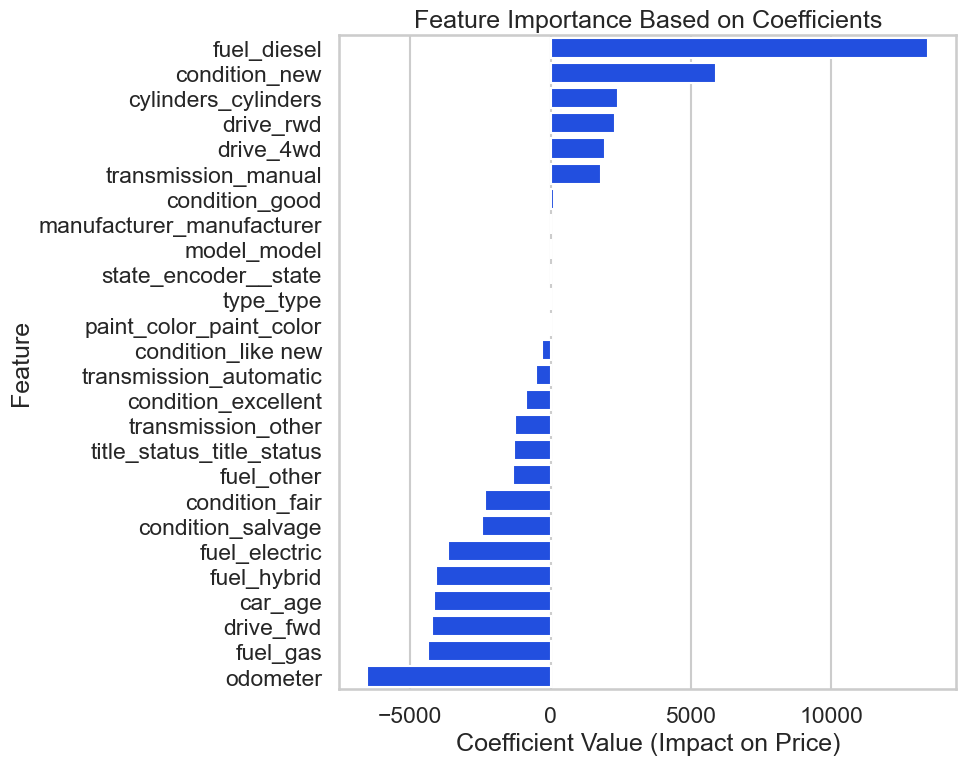

In [13]:
# Generate a plot of the feature importances

coeff_df = pd.DataFrame(list(feature_importance.items()), columns=["Feature", "Coefficient"])
coeff_df["Coefficient"] = coeff_df["Coefficient"].astype(float)
coeff_df = coeff_df.sort_values(by="Coefficient", ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(data=coeff_df, y="Feature", x="Coefficient", legend=False)
plt.title("Feature Importance Based on Coefficients")
plt.xlabel("Coefficient Value (Impact on Price)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Coefficient Interpretation for Linear Regression

The coefficients provide insights into how each feature influences the predicted price. Here's a breakdown:

---

#### **Key Positive Coefficients (Increase Price)**:
1. **`fuel_diesel`: +\$13,451**  
   - Diesel vehicles are valued significantly higher than others, likely due to better fuel efficiency and durability.

2. **`odometer`: -\$6,529**  
   - Odometer (mileage) has a strong negative impact. For each standard deviation increase in mileage, price decreases by approximately $6,529.

3. **`condition_new`: +\$5,887**  
   - Vehicles in "new" condition command a significant premium over others.

4. **`cylinders`: +\$2,408**  
   - Cars with more cylinders (often associated with larger, high-performance vehicles) are priced higher.

5. **`drive_4wd`: +\$1,924**  
   - Four-wheel drive (4WD) vehicles are valued higher, likely due to their off-road and all-weather capabilities.

---

#### **Key Negative Coefficients (Decrease Price)**:
1. **`car_age`: -\$4,151**  
   - Older cars are less valuable, with a decrease in price per standard deviation increase in age.

2. **`condition_salvage`: -\$2,452**  
   - Cars with a "salvage" title (indicating significant damage) are substantially devalued.

3. **`fuel_gas`: -\$4,386**  
   - Gasoline-powered cars are valued less than diesel, hybrid, or electric vehicles.

4. **`fuel_hybrid`: -\$4,068**  
   - Hybrid vehicles are priced lower compared to diesel but higher than gasoline.

5. **`fuel_electric`: -\$3,653**  
   - Electric vehicles, while gaining popularity, may have lower resale value due to concerns about battery longevity.

---

#### **Neutral or Small Coefficients**:
1. **`state`: -\$2.74**  
   - State of sale has almost no impact on price, suggesting limited regional price differences.

2. **`type`: -\$25.59**  
   - Vehicle type has minimal impact, as this factor may already be captured by other features like `drive` or `cylinders`.

3. **`manufacturer` and `model`: +\$0.66 and +\$0.016**  
   - Minimal direct impact, as these variables may be diluted across other features like `condition` and `fuel`.

---

### Insights and Recommendations:
1. **Condition and Fuel Type Are Critical**:
   - Investing in vehicles in "new" or "excellent" condition and prioritizing diesel or high-performing engines will likely yield higher resale prices.

2. **Mileage and Age Are Key Price Predictors**:
   - Cars with lower mileage and newer models fetch higher prices, consistent with consumer expectations.

3. **Special Cases for Salvage and Electric**:
   - Avoiding salvage vehicles and carefully pricing electric cars (considering battery degradation) can optimize profitability.

4. **Four-Wheel Drive Demand**:
   - Vehicles with 4WD command a higher price, highlighting a market preference for versatility.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### **Recommendations for Deployment**
1. **Actionable Insights**:
   - **Stock Diesel and 4WD Vehicles**:
     - Higher margins for diesel cars and 4WD capabilities due to strong consumer demand.
   - **Avoid Salvage Vehicles**:
     - Salvage condition reduces resale value significantly.
   - **Emphasize Newer Models with Low Mileage**:
     - Target cars with fewer miles and newer manufacturing years to maximize profit.

2. **Model Deployment Strategy**:
   - Use the Ridge Regression model to:
     - Predict prices dynamically based on car features.
     - Provide sales teams with data-driven pricing recommendations.